In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 加载上呼吸道数据集


In [3]:
# 读入数据
data = pd.read_csv('./data/上呼吸道感染.csv',parse_dates=[0])
data

,date,count
0,2017-01-01,50
1,2017-01-02,18
2,2017-01-03,27
3,2017-01-04,33
4,2017-01-05,16
...,...,...
723,2018-12-27,43
724,2018-12-28,65
725,2018-12-29,67
726,2018-12-30,61


<AxesSubplot:>

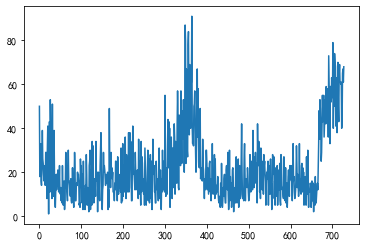

In [4]:
data = data.rename(columns={'date':'ds','count':'y'})
data.y.plot(x='ds',y='y')

In [28]:
# Create Training and Test
train_size= int(len(data)*0.9)
test_size= len(data) -train_size
train = data[:train_size]
test = data[train_size:]

## 增加年度趋势和周趋势参数

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


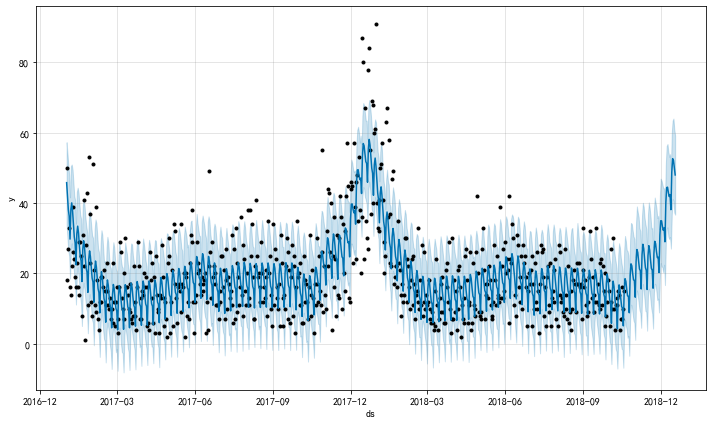

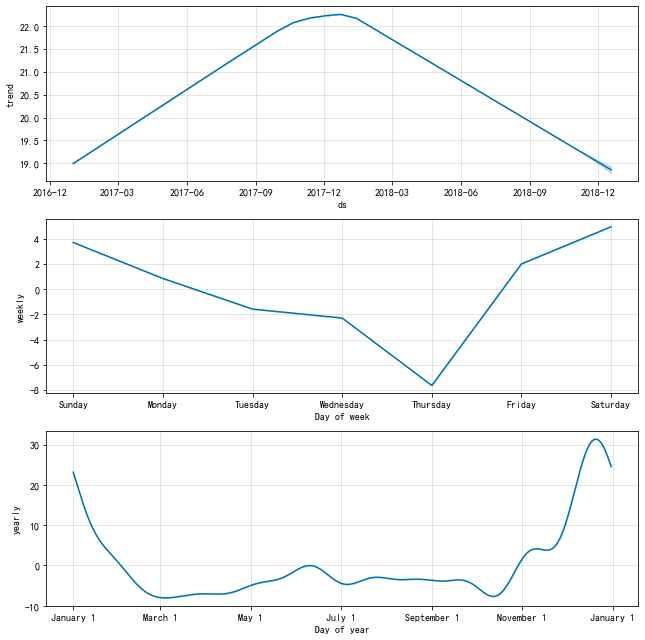

In [29]:
df = train
m = Prophet(weekly_seasonality=True,yearly_seasonality=True)
m.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)
m.fit(df)
# 计算预测值：periods 表示需要预测的点数，freq 表示时间序列的频率。
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
#画出预测图：
a=m.plot(forecast)
#画出时间序列的分量：
a=m.plot_components(forecast)

## 增加假日数据

In [30]:
from fbprophet import Prophet
from fbprophet.make_holidays import make_holidays_df

# 获取节假日的时间
holidays= make_holidays_df([2017,2018,2019,2020],'China')
def holiday_lower_upper(holiday):
    if holiday == 'Chinese New Year':
        return [-2,7]
    elif holiday== 'National Day':
        return [-1,6]
    else:
        return [0,0]

holidays['lower_window'] = holidays['holiday'].map(lambda x: holiday_lower_upper(x)[0])
holidays['upper_window'] = holidays['holiday'].map(lambda x: holiday_lower_upper(x)[1])
holidays

,ds,holiday,lower_window,upper_window
0,2017-01-01,New Year's Day,0,0
1,2017-01-28,Chinese New Year,-2,7
2,2017-04-04,Tomb-Sweeping Day,0,0
3,2017-04-05,Tomb-Sweeping Day,0,0
4,2017-05-01,Labor Day,0,0
5,2017-05-30,Dragon Boat Festival,0,0
6,2017-10-04,Mid-Autumn Festival,0,0
7,2017-10-01,National Day,-1,6
8,2018-01-01,New Year's Day,0,0
9,2018-02-16,Chinese New Year,-2,7


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


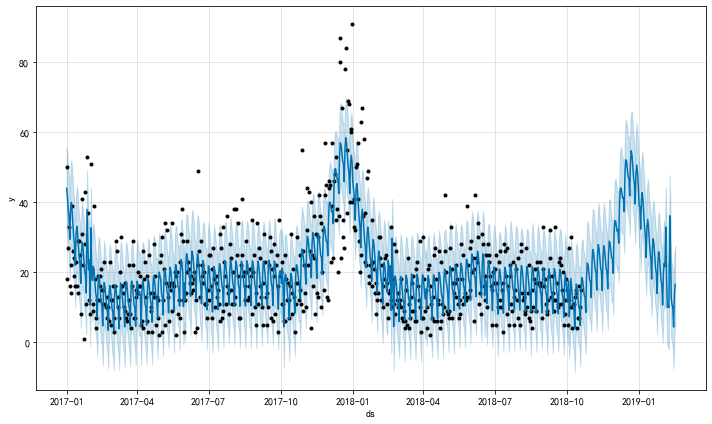

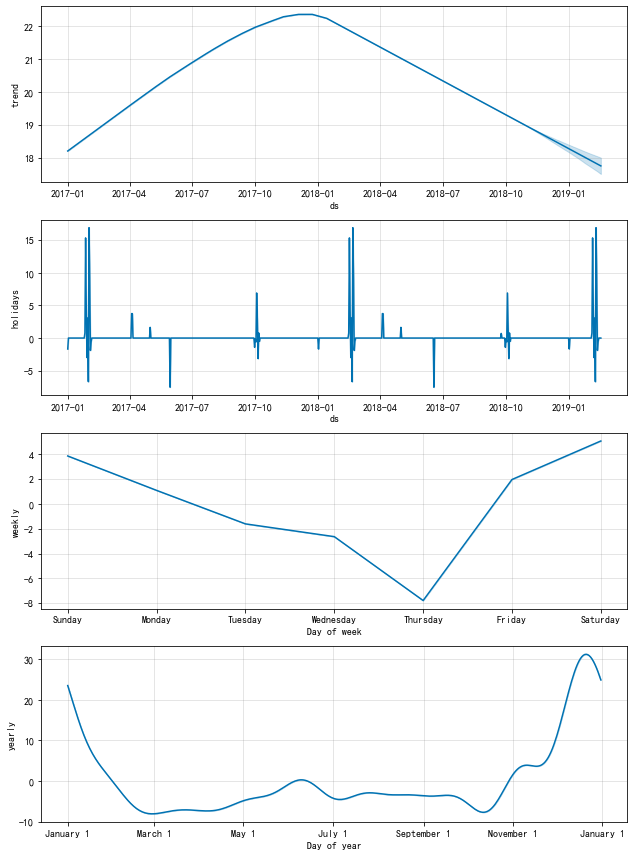

In [31]:
m = Prophet(holidays=holidays, holidays_prior_scale=10.0,weekly_seasonality=True,yearly_seasonality=True)
# m = Prophet()
m.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)
m.fit(df)
# 计算预测值：periods 表示需要预测的点数，freq 表示时间序列的频率。
future = m.make_future_dataframe(periods=120)
forecast = m.predict(future)
#画出预测图：
m.plot(forecast)
#画出时间序列的分量：
a=m.plot_components(forecast)

## 变点的设置
在 Prophet 里面，变点默认的选择方法是前 80% 的点中等距选择 25 个点作为变点，也可以通过以下方法来自行设置变点，甚至可以人为设置某些点。

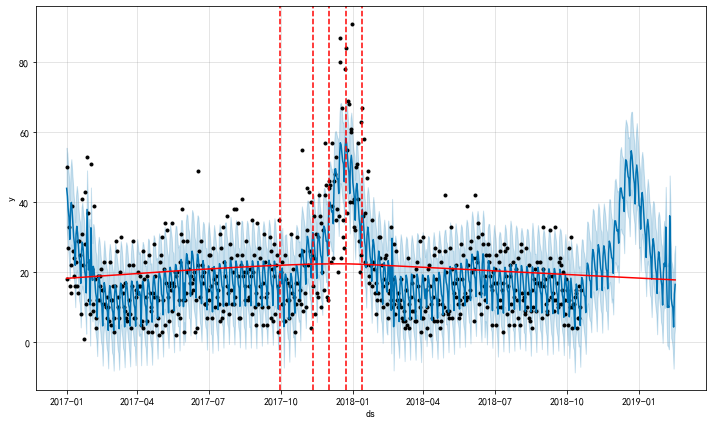

In [32]:
# m = Prophet(n_changepoints=25)
# m = Prophet(changepoint_range=0.8)
# m = Prophet(changepoint_prior_scale=0.05)
# m = Prophet(changepoints=['2014-01-01'])

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## 度量(预测值vs 真实值)

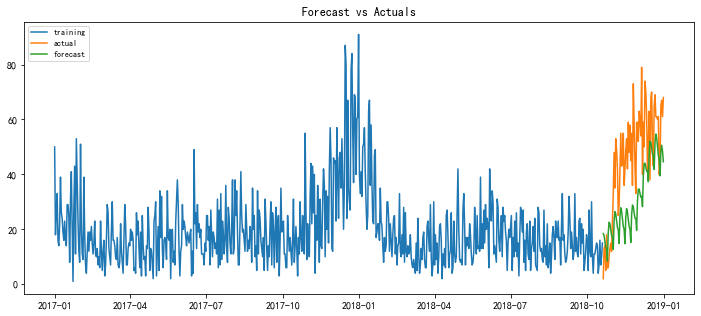

In [38]:
forecast = m.predict(test)
# Plot
plt.figure(figsize=(12,5))
plt.plot(train['ds'],train['y'], label='training')
plt.plot(test['ds'],test['y'] ,label='actual')
plt.plot(forecast['ds'],forecast['yhat'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:

from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(test['y'], forecast['yhat'])
print('mse=',mse)

mse= 432.4958105088789
